In [333]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Do not wrap DataFrame output

In [334]:
# Read the Parquet file into a DataFrame
df_X = pd.read_parquet(r'../Data/X.parquet')
print(df_X.shape)

df_data = pd.read_parquet(r'../Data/Np_cleaned.parquet')
print(df_data.shape)

(3872, 18)
(3872, 26)


In [335]:
# View Data
print(df_X.shape)
display(df_X.dtypes)
df_X.describe()

(3872, 18)


time_numeric            int32
date_numeric            int32
client_label_encoded    int32
Promo_CLP1               bool
Promo_NPJEWEL            bool
Promo_PRD10              bool
Promo_PRD15              bool
Promo_PRD5               bool
Promo_RDM1               bool
Promo_RDMCQ1             bool
Promo_RPAWN              bool
Promo_[None]             bool
Status_Expired           bool
Status_New Prenda        bool
Status_Pulled-Out        bool
Status_Redeemed          bool
Status_Renewed           bool
Status_Sold              bool
dtype: object

,time_numeric,date_numeric,client_label_encoded
count,3872.000000,3872.000000,3872.000000
mean,48612.280992,11519.437500,4.587552
std,9643.683800,388.943925,2.917815
min,26760.000000,10953.000000,0.000000
25%,41040.000000,11163.000000,2.000000
50%,49440.000000,11537.000000,5.000000
75%,56235.000000,11868.000000,7.000000
max,69180.000000,12250.000000,9.000000


In [336]:
# Scale
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
X = df_X.values
X_scaled = scaler.fit_transform(X)
df_X_scaled = pd.DataFrame(X_scaled, columns=df_X.columns)
df_X_scaled['client_label_encoded'] = df_X['client_label_encoded'].values
X_scaled = df_X_scaled.values
display(pd.DataFrame(X_scaled).describe())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,3.872000e+03,3.872000e+03,3872.000000,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03,3.872000e+03
mean,-3.633457e-16,9.175397e-18,4.587552,-3.303143e-17,4.954714e-17,-4.220683e-17,8.257857e-18,-2.752619e-18,-2.752619e-18,7.340318e-18,2.018587e-17,-2.569111e-17,6.055762e-17,-6.973302e-17,-2.752619e-18,8.900135e-17,5.711685e-17,5.505238e-18
std,1.000129e+00,1.000129e+00,2.917815,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00
min,-2.266261e+00,-1.456536e+00,0.000000,-1.286071e-01,-4.090475e-01,-3.191836e-01,-2.918935e-01,-1.405434e-01,-1.607268e-02,-1.653124e-01,-4.255732e-02,-1.281093e+00,-2.309087e-01,-1.788378e-01,-4.470750e-01,-1.251374e+00,-2.149505e-01,-3.284332e-01
25%,-7.853077e-01,-9.165422e-01,2.000000,-1.286071e-01,-4.090475e-01,-3.191836e-01,-2.918935e-01,-1.405434e-01,-1.607268e-02,-1.653124e-01,-4.255732e-02,-1.281093e+00,-2.309087e-01,-1.788378e-01,-4.470750e-01,-1.251374e+00,-2.149505e-01,-3.284332e-01
50%,8.584125e-02,4.516016e-02,5.000000,-1.286071e-01,-4.090475e-01,-3.191836e-01,-2.918935e-01,-1.405434e-01,-1.607268e-02,-1.653124e-01,-4.255732e-02,7.805832e-01,-2.309087e-01,-1.788378e-01,-4.470750e-01,7.991214e-01,-2.149505e-01,-3.284332e-01
75%,7.905385e-01,8.962925e-01,7.000000,-1.286071e-01,-4.090475e-01,-3.191836e-01,-2.918935e-01,-1.405434e-01,-1.607268e-02,-1.653124e-01,-4.255732e-02,7.805832e-01,-2.309087e-01,-1.788378e-01,-4.470750e-01,7.991214e-01,-2.149505e-01,-3.284332e-01
max,2.133041e+00,1.878566e+00,9.000000,7.775623e+00,2.444704e+00,3.132993e+00,3.425907e+00,7.115242e+00,6.221736e+01,6.049151e+00,2.349772e+01,7.805832e-01,4.330716e+00,5.591660e+00,2.236761e+00,7.991214e-01,4.652233e+00,3.044759e+00


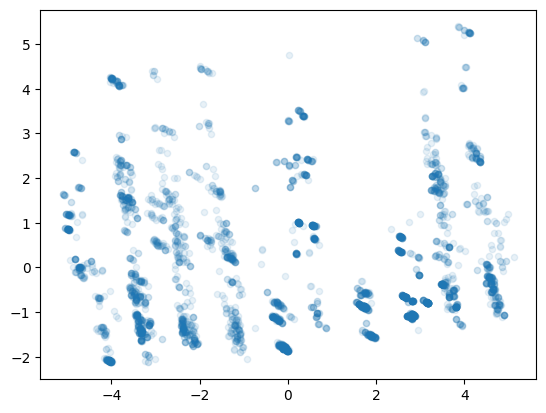

In [337]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0],X_pca[:, 1], s=20, alpha=0.1)
plt.show()

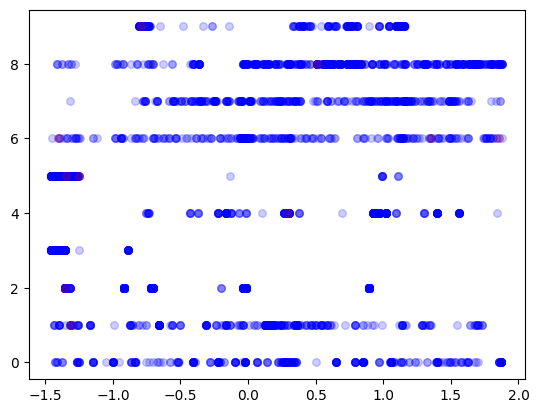

In [338]:
from sklearn.neighbors import NearestNeighbors

# Fit the KNN model
k = 3  # Number of neighbors to consider
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(X_scaled)

# Calculate distances to k neighbors
distances, indices = knn_model.kneighbors(X_scaled)

# Calculate anomaly scores as the average distance to k neighbors
anomaly_scores = distances.mean(axis=1)

z_scores = np.abs((anomaly_scores - anomaly_scores.mean()) / anomaly_scores.std())
anomaly_scores = pd.DataFrame(anomaly_scores)
outlier = X_scaled[(z_scores > 2)]

plt.scatter(X_scaled[:, 1],X_scaled[:, 2], color='blue', s=30, alpha=0.2)
plt.scatter(outlier[:, 1], outlier[:, 2], color='red', s=30, alpha=0.2)
plt.show()

noise: 1294 total: 3872


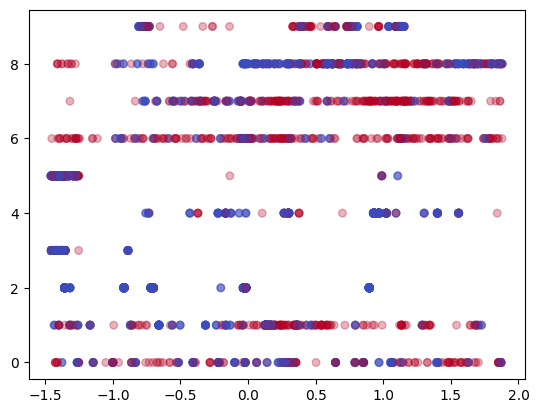

In [339]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=3)
labels = dbscan.fit_predict(X_scaled)

noise = np.where(labels == -1, 1, 0)
print('noise:', X_scaled[np.where(labels == -1)].shape[0],
      'total:', X_scaled.shape[0])

plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=noise, cmap='coolwarm', s=30, alpha=.3)
plt.show()

In [340]:
df_noise = pd.DataFrame(noise,columns=['noise'])
df_data_y = pd.concat([df_data, df_X_scaled, df_noise], axis=1)
df_data_y['is_prd'] = np.select(
      [df_data_y['PromoCode']=='None'],
      ['prd'],
      default = 'non_prd'
)
display(df_data_y.head())

,TicketNo,fld_BranchCode,fld_RegionCode,fld_AreaCode,fld_BranchName,PrincipalAmt,LoanDate,DateCreated,ExpiryDate,TransStatus,FormNo,StorageGroupName,DesignModelName,fld_Weight,fld_Karat,fld_ItemDescription,fld_StorageGroupID,fld_AppraiseValue,PromoCode,PromoReason,InterestNewPrenda,fld_CustomerNo,new_PTStarRating,fld_FirstName,fld_MiddleName,fld_LastName,time_numeric,date_numeric,client_label_encoded,Promo_CLP1,Promo_NPJEWEL,Promo_PRD10,Promo_PRD15,Promo_PRD5,Promo_RDM1,Promo_RDMCQ1,Promo_RPAWN,Promo_[None],Status_Expired,Status_New Prenda,Status_Pulled-Out,Status_Redeemed,Status_Renewed,Status_Sold,noise,is_prd
20,61752SG002038,61752,2B,216,CLH Tarcan,21000.0,2020-09-08 14:29:00,2020-09-08 14:30:00,2021-01-08,Redeemed,2B-IC223160,JEWELRY W/BRILL-GOLD,-,8.1,21K,"-,Others,cross des def",7,24075.00,[None],,840.00,617520014594,0.0,GRACE,V.,CASTRO,-0.791530,0.153159,1.0,-0.128607,-0.409048,-0.319184,-0.291893,-0.140543,-0.016073,-0.165312,-0.042557,0.780583,-0.230909,-0.178838,-0.447075,0.799121,-0.214951,-0.328433,0.0,non_prd
203,20111SG094315,20111,2B,216,CLH Malolos 2,10755.0,2020-02-05 17:53:00,2020-02-05 17:54:00,2020-06-05,Redeemed,2B-NC149174,JEWELRY-GOLD,-,3.8,21K,"-,Yellow Gold,",13,10755.14,RDMCQ1,covid,430.20,201110475003,0.0,LEONORA,SANTIAGO,BASALLO,0.676978,-1.348537,5.0,7.775623,-0.409048,-0.319184,-0.291893,-0.140543,-0.016073,-0.165312,-0.042557,-1.281093,-0.230909,-0.178838,2.236761,-1.251374,-0.214951,-0.328433,1.0,non_prd
286,61458SG004221,61458,2B,216,CLH Balagtas Saint Anne Square,3430.0,2020-01-03 13:45:00,2020-01-03 13:45:00,2020-05-04,Sold,2B-IC622507,JEWELRY-GOLD,-,1.4,21K,"-,NA,",13,3430.00,[None],,137.20,201110599464,0.0,CZARINA ANNE,ANGELES,ESGUERRA,0.515193,-1.369108,3.0,-0.128607,-0.409048,-0.319184,-0.291893,-0.140543,-0.016073,-0.165312,-0.042557,0.780583,-0.230909,-0.178838,-0.447075,0.799121,-0.214951,-0.328433,0.0,non_prd
322,20111SG0108668,20111,2B,216,CLH Malolos 2,5500.0,2021-10-15 13:50:00,2021-10-15 13:53:00,2022-02-14,Pulled-Out,2B-NQ418503,JEWELRY-GOLD,-,2.0,18K,"-,White Gold,cable",13,5500.00,PRD10,4star,220.00,201110433348,4.0,MYLENE,MERCADO,GABRIEL,-0.219061,-1.320252,1.0,-0.128607,-0.409048,3.132993,-0.291893,-0.140543,-0.016073,-0.165312,-0.042557,-1.281093,-0.230909,-0.178838,2.236761,-1.251374,-0.214951,-0.328433,0.0,non_prd
426,60845SG023991,60845,2B,216,CLH Malolos - Pariancillo,2646.0,2020-02-29 15:42:00,2020-02-29 15:43:00,2020-06-29,Redeemed,2B-NJ461957,JEWELRY-GOLD,ROPE -NG,1.2,18K,"ROPE -NG,NA,",13,2646.00,RDMCQ1,ECQ,105.84,209080012716,0.0,MARICAR,B.,AGBUNAG,1.393187,1.240860,6.0,-0.128607,2.444704,-0.319184,-0.291893,-0.140543,-0.016073,-0.165312,-0.042557,-1.281093,-0.230909,-0.178838,-0.447075,-1.251374,4.652233,-0.328433,1.0,non_prd


In [341]:
df_data_y.groupby('fld_CustomerNo').size().sort_values(ascending=False)

fld_CustomerNo
603880052772    578
201110475003    490
201110433348    412
209080012716    398
603750427211    375
201020210909    344
617520014594    342
201110640845    319
603750011557    312
201110599464    302
dtype: int64

(490, 46)


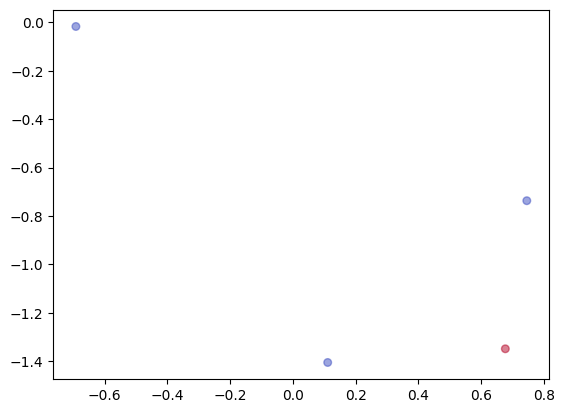

In [342]:
X_temp = df_data_y[df_data_y['fld_CustomerNo']=='201110475003']
print(X_temp.shape)

plt.scatter(X_temp['time_numeric'], X_temp['date_numeric'], c=X_temp['noise'], cmap='coolwarm', s=30, alpha=.50)
plt.show()